<a href="https://colab.research.google.com/github/Malbasahi/TechnoHacks_Diabetes_Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Additional models (e.g., MLP - Multi-Layer Perceptron)
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [143]:
data = pd.read_csv('/content/diabetes.csv')

In [144]:
# Explore the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


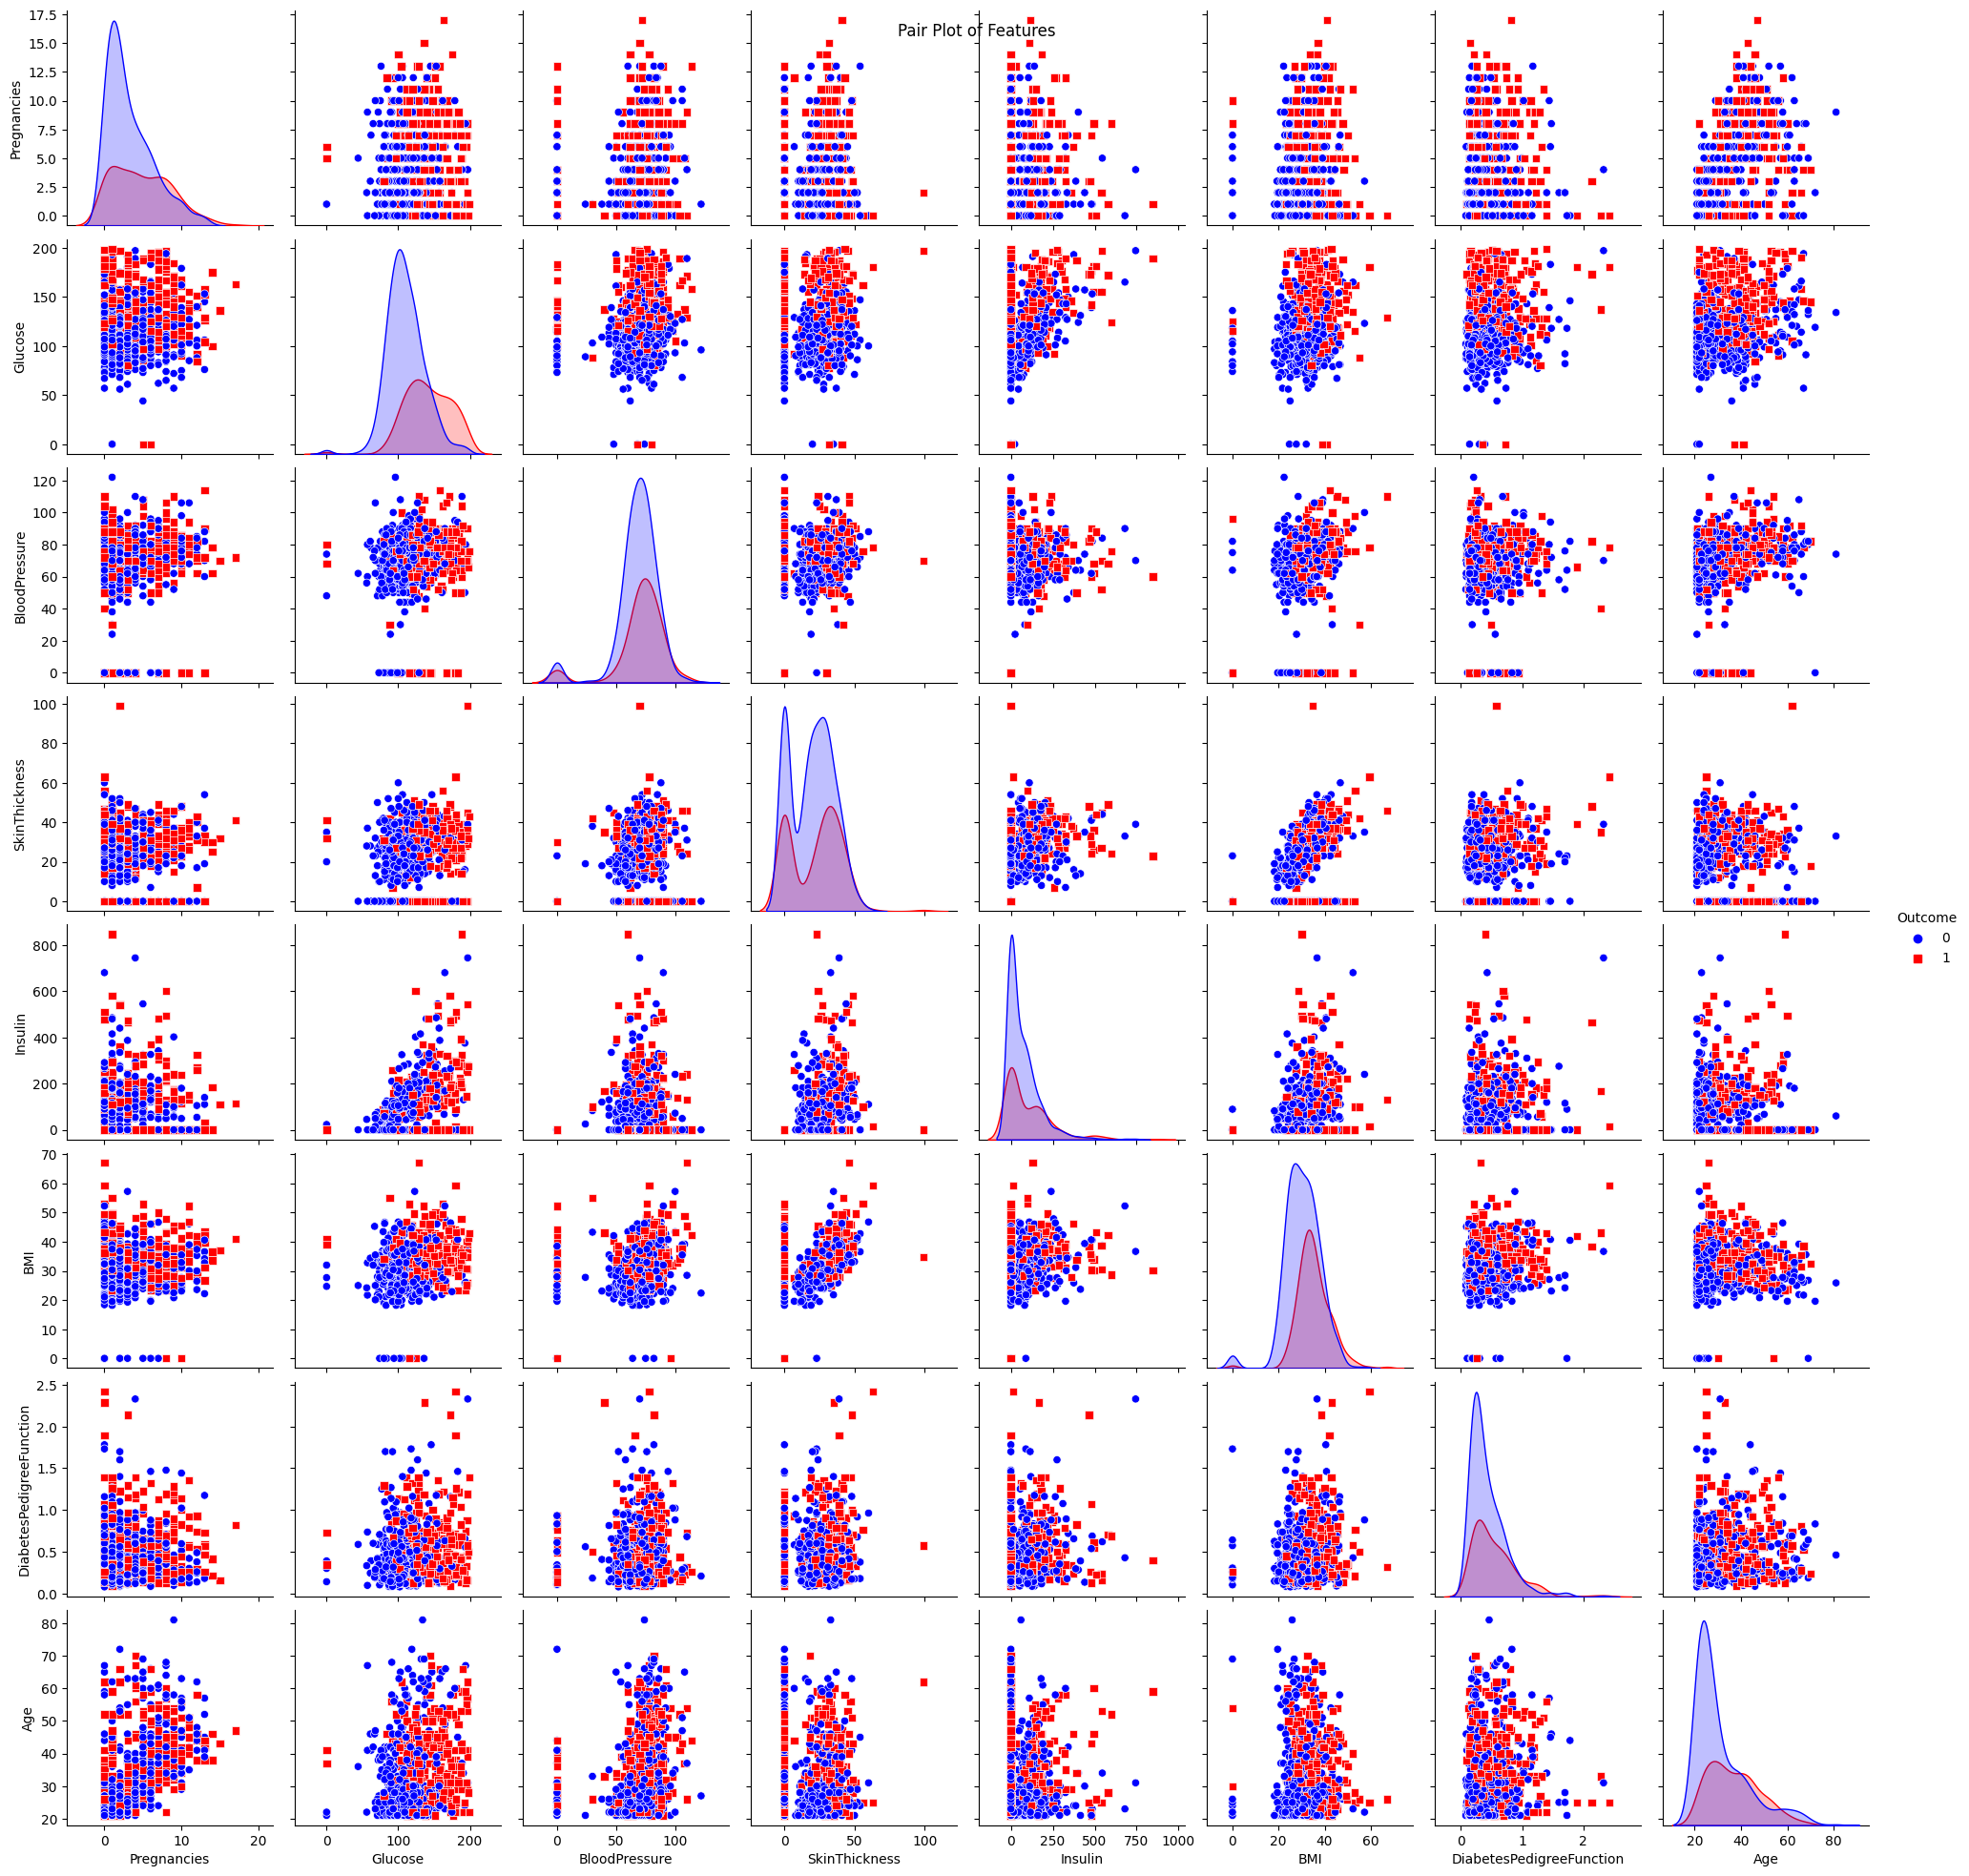

In [164]:
# Pair Plot
sns.pairplot(data, hue='Outcome', markers=["o", "s"], palette={0: 'blue', 1: 'red'})
plt.suptitle("Pair Plot of Features")
plt.show()

In [165]:
# Scatter Plots
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot: Glucose vs. BMI')

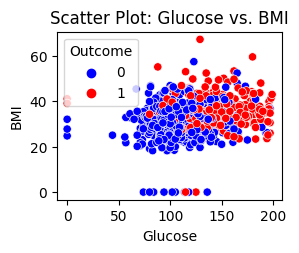

In [169]:
# Scatter plot between Glucose and BMI
plt.subplot(2, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', data=data, hue='Outcome', palette={0: 'blue', 1: 'red'})
plt.title("Scatter Plot: Glucose vs. BMI")

Text(0.5, 1.0, 'Scatter Plot: Age vs. Insulin')

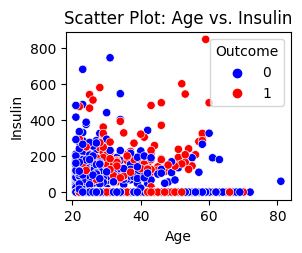

In [168]:
# Example: Scatter plot between Age and Insulin
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Insulin', data=data, hue='Outcome', palette={0: 'blue', 1: 'red'})
plt.title("Scatter Plot: Age vs. Insulin")

In [145]:
# Data preprocessing
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [146]:
# Replace missing values with the median (better for skewed data)
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [147]:
# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [148]:
# Feature scaling (normalize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [149]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# Apply SMOTE for data augmentation to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [152]:
# Define a list of classifiers with hyperparameter tuning
classifiers = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42, penalty='l2', solver='lbfgs'),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1.0]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },

    "XGBoost" : {
    "model": XGBClassifier(random_state=42),
    "params": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
        }
    },
    "MLP" : {
    "model": MLPClassifier(random_state=42),
    "params": {
        'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [100, 200, 300],
        }
    }
}

In [153]:
# Initialize variables to store results
best_classifier = None
best_accuracy = 0

In [154]:
# Initialize variables to store accuracies for visualization
classifier_names = []
classifier_accuracies = []

In [155]:
# Iterate through classifiers, perform GridSearchCV, fit, and evaluate
for name, clf_info in classifiers.items():
    clf = clf_info["model"]
    param_grid = clf_info["params"]

    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

    classifier_names.append(name)
    classifier_accuracies.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = (name, best_clf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Accuracy: 0.7337662337662337
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Logistic Regression Accuracy: 0.7337662337662337
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Support Vector Machine Accuracy: 0.7532467532467533
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Gradient Boosting Accuracy: 0.7402597402597403
Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoost Accuracy: 0.7662337662337663
Fitting 5 folds for each of 6 candidates, totalling 30 fits
K-Nearest Neighbors Accuracy: 0.6818181818181818
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost Accuracy: 0.7662337662337663
Fitting 5 folds for each of 27 candidates, totalling 135 fits
MLP Accuracy: 0.6818181818181818


In [158]:
# Print the best classifier and its parameters
best_classifier_name, best_clf = best_classifier
print(f"The best classifier is: {best_classifier_name} with an accuracy of {best_accuracy}")
print(f"Best {best_classifier_name} parameters: {best_clf.get_params()}")

The best classifier is: AdaBoost with an accuracy of 0.7662337662337663
Best AdaBoost parameters: {'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 42}


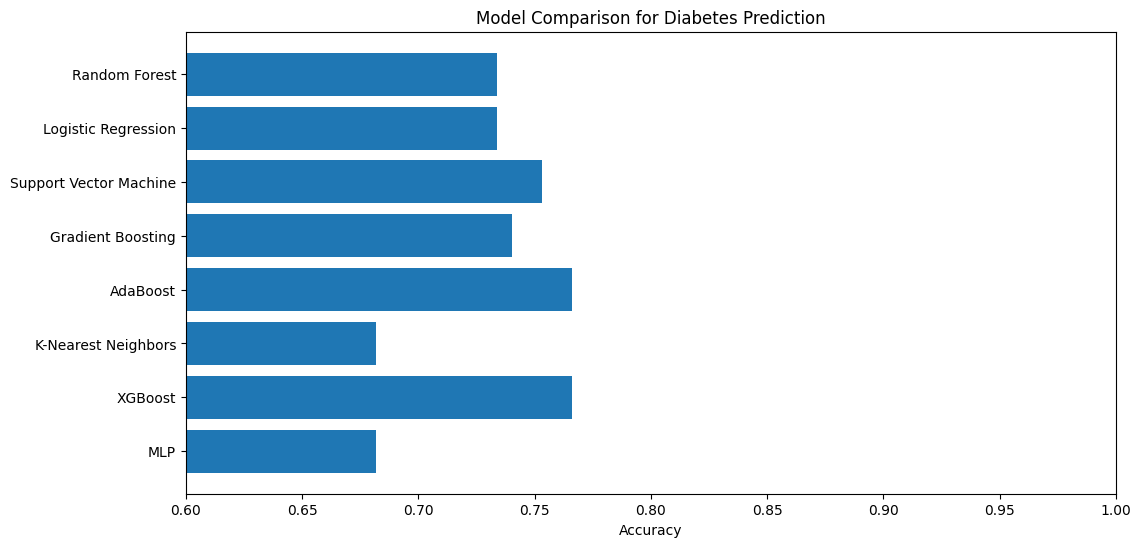

In [159]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.barh(classifier_names, classifier_accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison for Diabetes Prediction')
plt.xlim(0.6, 1.0)  # Set the x-axis limit to improve visualization
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()